# **Métodos Avanzados en Estadística**

## Estimación no paramétrica

*Autor: Daniel Beteta Francisco*

In [1]:
install.packages("tidyverse")
library(tidyverse)

SEED <- 123
set.seed(SEED)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Ejercicio 1

**La función (ksnoest) calcula el estadístico de
Kolmogorov-Smirnov cuando estamos interesados en
contrastar si nuestros datos siguen una distribución normal
estándar:**

In [2]:
ksnoest <- function(datos){
  y <- ks.test(datos, pnorm)$statistic
  return(y)
}

**Supongamos que queremos contrastar la hipótesis nula de
que los datos son normales (con valores arbitrarios de la
media y la desviación típica). Una posibilidad es estimar los
parámetros de la normal y comparar la función de distribución
empírica $F{n}$ con la función de distribución de una variable
$N(\hat{\mu}, \hat{\sigma}^2)$. La siguiente función calcula el correspondiente
estadístico de Kolmogorov-Smirnov:**

In [3]:
ksest <- function(datos){
  mu <- mean(datos)
  stdev <- sd(datos)
  y <- ks.test(datos, pnorm, mean=mu, sd=stdev)$statistic
  return(y)
}

**1. Genera 1000 muestras de tamaño 20 y calcula ambos
estadísticos (ksnoest y ksest) para cada una de ellas.**

In [4]:
n <- 20
m <- 1000
kse <- c()
ksn <- c()

for (i in 1:m){
  datos <- rnorm(n)
  kse <- c(kse, ksest(datos)[[1]])
  ksn <- c(ksn, ksnoest(datos)[[1]])
}

**2. Mediante diagramas de cajas, compara las distribuciones
de ambos estadísticos. ¿En cuál de los dos casos se
obtienen en media valores menores? ¿Podrías dar una
razón intuitiva?**

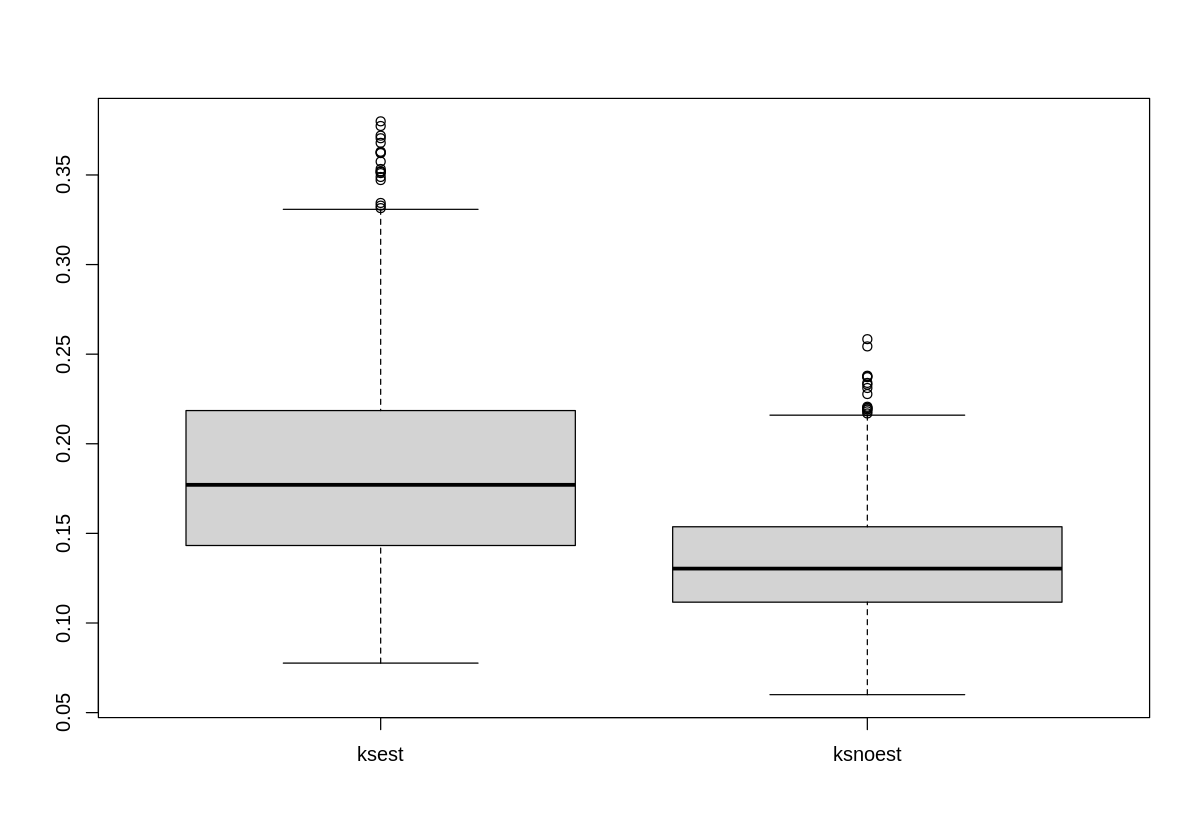

In [5]:
options(repr.plot.width=10, repr.plot.height=7)

boxplot(ksn, kse, names=c("ksest", "ksnoest"))

Se obtienen en media valores menores en el ksnoest, así se puede observar tanto en la mediana como en la varianza de dicho estimador. La razón de dicha diferencia se encuentra en la falta de estandarización.

**3. Imagina que estimamos los parámetros y usamos las
tablas de la distribución del estadístico de Kolmogorov-
Smirnov para hacer el contraste a nivel $\alpha$. El verdadero
nivel de significación, ¿es mayor o menor que $\alpha$?**

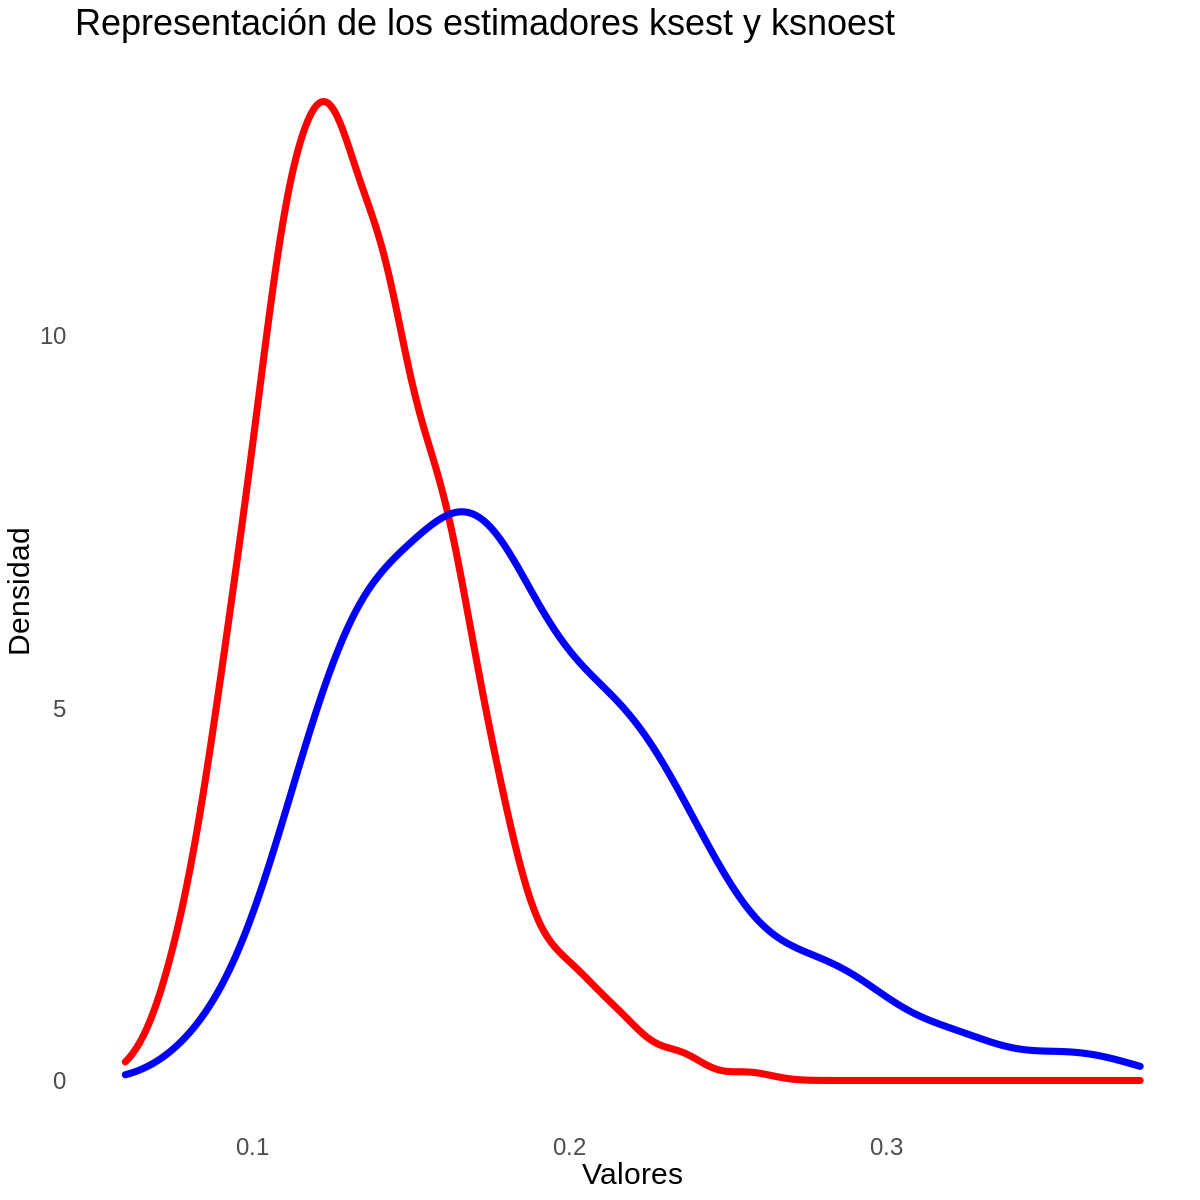

In [6]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot()+
  geom_density(aes(kse), col="red", size=2) +
  geom_density(aes(ksn), col="blue", size=2) +
  labs(x="Valores", y='Densidad', title="Representación de los estimadores ksest y ksnoest") +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

El verdadero nivel de significación siempre va a ser más pequeño que $\alpha$, ya que la distribución de ksnoest es mucho más grande, ya que el valor de $D=Sup|Fn(x)−F0(x)|$ donde $F0$ es un valor fijo que sigue una distribución normal estandar, la cual, va a ser mayor a ksest ya que su valor de $D$ se calcula como: $D^n=Sup|Fn(x)−F^n(x)|$ donde $F^n$ es una distribución generada por la media y desvicaión típica de la fuente de datos.

**4. Para resolver el problema se ha estudiado la distribución
en el caso de muestras normales con parámetros
estimados. Es lo que se conoce como contraste de
normalidad de Kolmogorov-Smirnov-Lilliefors (KSL).
Según la tabla del estadístico KSL, el nivel crítico para $\alpha = 0.05$ y $n = 20$ es $0.190$. Esto significa que el
porcentaje de valores de ksest mayores que 0.19 en
nuestra simulación debe ser aproximadamente del 5%.
Compruébalo a partir de los resultados de los apartados
anteriores.**

In [7]:
cont = 0

for (i in 1:m){
  if (kse[i] > 0.19){
    cont= cont+1
  }
}

porcentaje_valores <- (cont/m)*100

porcentaje_valores

[1] 5.5

Se ha podido comprobar que da aproximadamente el valor esperado $\approx5%$.

5**. Haz una pequeña simulación para aproximar el nivel de
significación del contraste KSL cuando se utiliza un valor
crítico 0.12 para muestras de tamaño 40.**

In [8]:
n <- 40

datos <- matrix(rnorm(n*m), n)

kse_2 <- apply(datos, 2, ksest)

cont = 0
for (i in 1:m){
  if (kse_2[i] > 0.12){
    cont = cont+1
  }
}

nivel_significacion <- cont/m

nivel_significacion

[1] 0.144

El nivel de significación sería entonces del 14,4%.

# Ejercicio 2

**Para la muestra del ejercicio 6 se verifica $S^2 ≈ 30.84$:**

In [9]:
muestra <- c(1, 2, 3.5, 4, 7, 7.3, 8.6, 12.4, 13.8, 18.1)
var_original <- var(muestra)
var_original

[1] 30.84233

**1. Usa bootstrap para determinar el error típico de este
estimador de $\sigma^2$.**

In [10]:
R <- 1000
n <- 10

In [11]:
bootstrap <- sample(muestra, n*R, rep=T)
bootstrap <- matrix(bootstrap, nrow=n)

var_bootstrap <- apply(bootstrap, 2, var)

sd_var <- sd(var_bootstrap)
cat("Estimador bootstrap de la desviación típica de la varianza:", sd_var, "\n")

Estimador bootstrap de la desviación típica de la varianza: 10.39516 


**2. Compara el resultado con el error típico que darías si, por
ejemplo, supieras que los datos proceden de una
distribución normal.**

Suponiendo que los datos fueran normales, independientes e idénticamente distribuidos, el estimador de la varianza seguiría una distribución gamma tal que:

$
S^2 \approx Gamma(\frac{n-1}{2}, \frac{\sigma^2}{n-1})
$

Cuya varianza de la varianza es:

$
Var(S^2) = \frac{2\sigma^4}{(n-1)} 
$

Y por tanto tomando la raíz cuadrada y sustituyendo $\sigma^2 = 30.8423$ y $n = 10$, obtendremos el valor del estimador botstrap de la desviación típica de la varianza:

$
\hat{\sigma}(S^2) = \sqrt{\frac{2*30.8423^2}{(10-1)}} ≈ 14.5392
$

**3. Calcula un intervalo de confianza para $\sigma^2$ usando el
método bootstrap híbrido. Fija $\alpha = 1 - 0.95$.**

Definido el estadístico:
$
T(X{1}, ..., X{n}; F) = \sqrt{n}(S^2_n - \sigma^2)
$

Si la distribución $H_n$ fuera conocida, nos quedaría el siguiente intervalo de confianza: 
$
[S^2 - n^{-1/2} H_n^{-1} (1 - \alpha/2); S^2 - n^{-1/2} H_n^{-1} (\alpha/2)]
$

Sin embargo $H_n$ no es conocida, pero se puede usar en su lugar el estimador bootstrap $\hat{H_n}$, esto significa que, una vez calculado los valores del estimador previamente definido, podemos ordenarlos de menor a mayor y seleccionar los percentiles que dejan a ambos lados una proporción de $\alpha/2$.

In [12]:
alpha <- 0.05

T_bootstrap <- sqrt(n) * (var_bootstrap-var_original)

ci_inf <- var_original - quantile(T_bootstrap, 1-alpha/2) / sqrt(n)
ci_sup <- var_original - quantile(T_bootstrap, alpha/2) / sqrt(n)

cat("Intevalo de confianza para sigma^2: [", ci_inf, ";", ci_sup, "]\n")

Intevalo de confianza para sigma^2: [ 14.07787 ; 53.35378 ]


# Ejercicio 3

**Considera una variable aleatoria con distribución
beta de parámetros $\alpha = 3$, $\beta = 6$.**

**1. Representa gráficamente la función de densidad y la
función de distribución.**

In [13]:
ALPHA <- 3
BETA <- 6

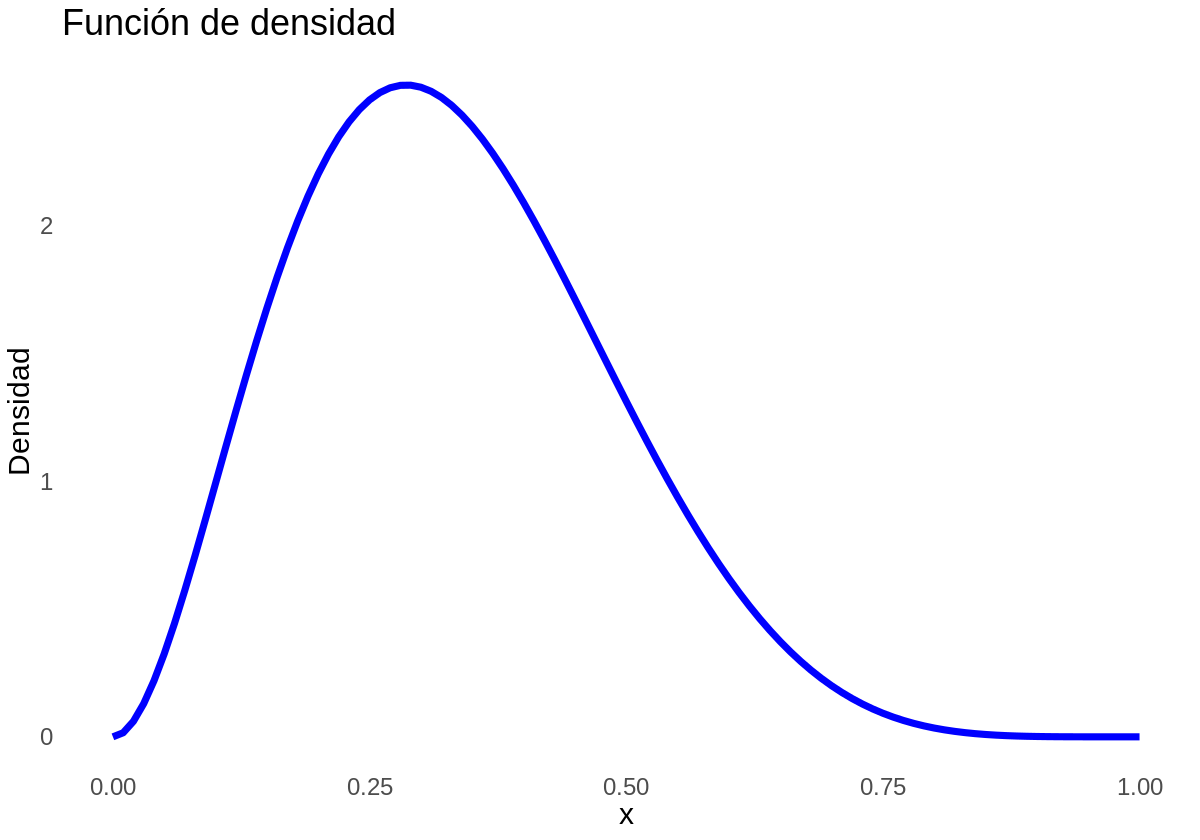

In [14]:
options(repr.plot.width=10, repr.plot.height=7)

ggplot()+
  geom_function(fun=dbeta, args=list(ALPHA, BETA), size=2, col="blue") +
  labs(x="x",y="Densidad", title="Función de densidad") +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

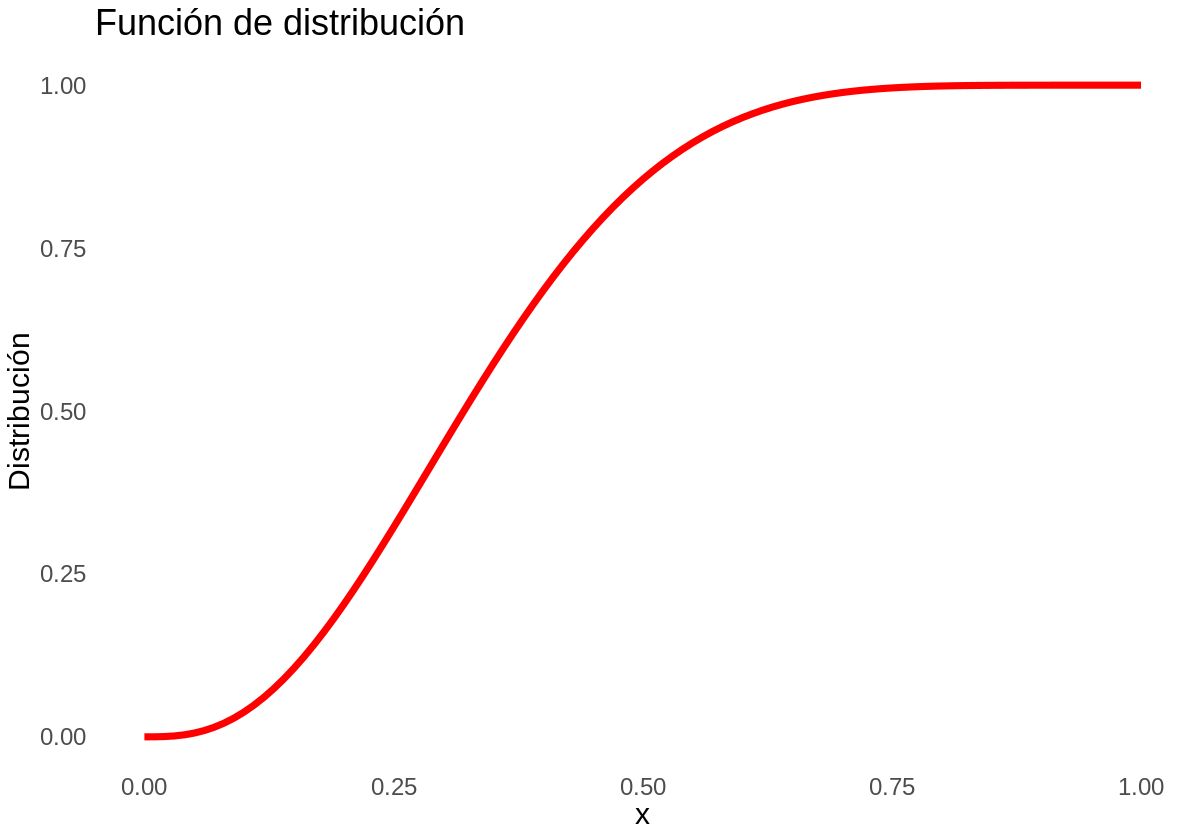

In [15]:
options(repr.plot.width=10, repr.plot.height=7)

ggplot()+
  geom_function(fun=pbeta, args=list(ALPHA, BETA), size=2, col="red") +
  labs(x="x",y="Distribución", title="Función de distribución") +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

**2. Simula una muestra de tamaño 20 de esta distribución. A
continuación, representa en los mismos gráficos del
apartado (a) las estimaciones de $F$ y $f$ obtenidas
respectivamente mediante la función de distribución
empírica $F{n}$ y un estimador del núcleo $\hat{f}$ obtenidos a
partir de la muestra simulada.**

In [16]:
n <- 20
muestra <- rbeta(n, ALPHA, BETA)

In [17]:
est_nucleo <- density(muestra)

est_nucleo


Call:
	density.default(x = muestra)

Data: muestra (20 obs.);	Bandwidth 'bw' = 0.06702

       x                 y           
 Min.   :-0.1115   Min.   :0.003349  
 1st Qu.: 0.1237   1st Qu.:0.184976  
 Median : 0.3589   Median :0.789323  
 Mean   : 0.3589   Mean   :1.061667  
 3rd Qu.: 0.5941   3rd Qu.:1.962666  
 Max.   : 0.8294   Max.   :2.627904  

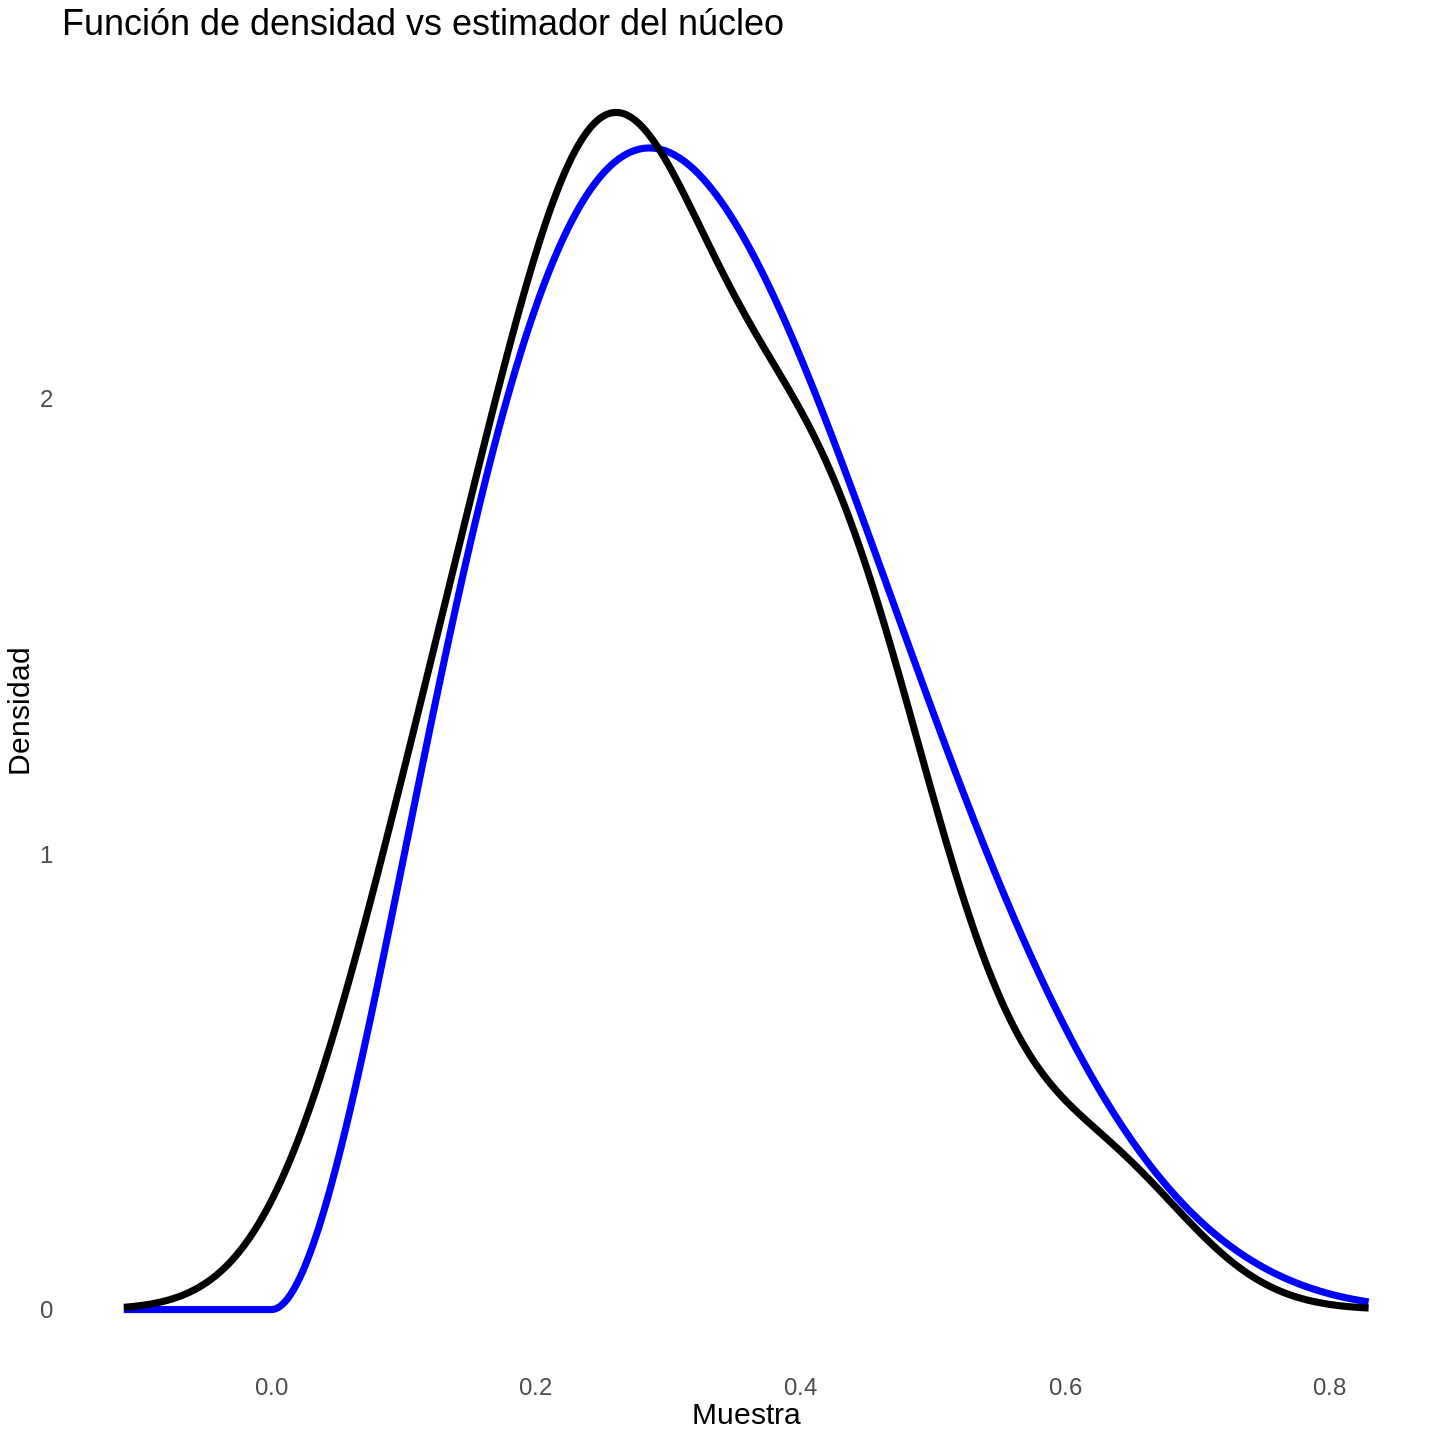

In [18]:
options(repr.plot.width=12, repr.plot.height=12)

ggplot() +
  geom_line(aes(est_nucleo$x, dbeta(est_nucleo$x, ALPHA, BETA)), col="blue", size=2) +
  geom_line(aes(est_nucleo$x, est_nucleo$y), col="black", size=2) +
  labs(x="Muestra",y="Densidad", title="Función de densidad vs estimador del núcleo") +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

In [19]:
df <- data.frame(muestra)

head(df)

,muestra
,<dbl>
1,0.2927804
2,0.1714070
3,0.1623958
4,0.0895852
5,0.2581832
6,0.2999361


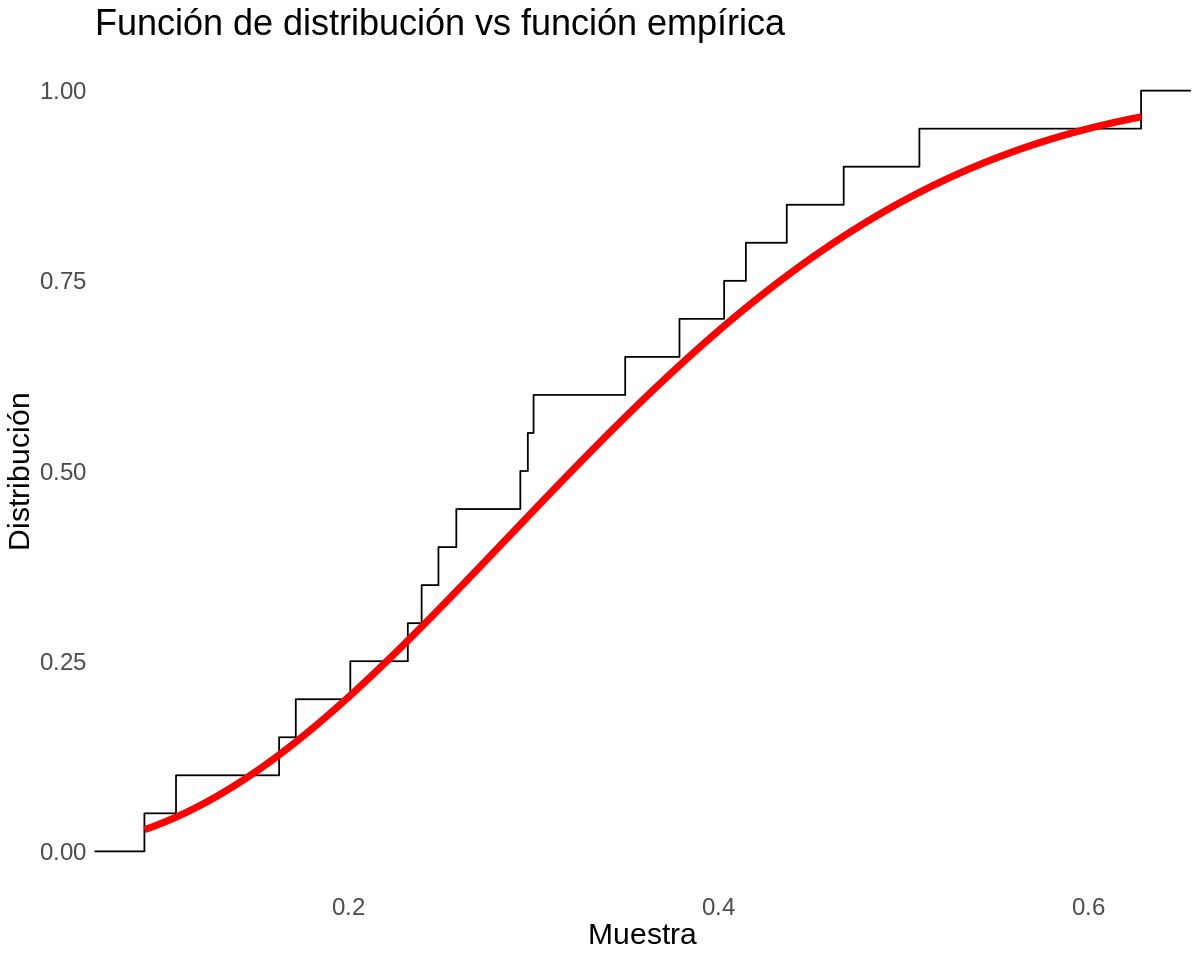

In [20]:
options(repr.plot.width=10, repr.plot.height=8)

ggplot(df, aes(muestra)) +
  stat_ecdf() +
  geom_function(fun=pbeta, args=list(ALPHA, BETA), col="red", size=2) + 
  labs(x ="Muestra", y = "Distribución", 
       title="Función de distribución vs función empírica") +
  theme_minimal() +
  theme(panel.grid=element_blank(), text=element_text(size=18))

**3.Verifica empíricamente el grado de aproximación
alcanzado en las estimaciones de $F$ y $f$. Para ello, genera
200 muestras de tamaño 20 y para cada una de ellas
evalúa el error (medido en la norma del supremo, es decir,
el máximo de las diferencias entre las funciones)
cometido al aproximar $F$ por $F{n}$ y $f$ por $\hat{f}$. Por último,
calcula el promedio de los 200 errores obtenidos** 

In [21]:
m <- 200

error_F <- c()
error_f <- c()

for (i in 1: m){
  muestra <- rbeta(n, ALPHA, BETA)
  
  ks_F <- ks.test(muestra, "pbeta", ALPHA, BETA)
  
  error_F <- c(error_F, ks_F$statistic)
  
  nucleo <- density(muestra, n)$y
  estimador <- dbeta(muestra, ALPHA, BETA)
  
  ks_f <- ks.test(nucleo, estimador)
  
  error_f <- c(error_f, ks_f$statistic)
  
}

cat("Promedio del error al aproximar F por Fn:", mean(error_F), "\n") 
cat("Promedio del error al aproximar f por f^:", mean(error_f), "\n") 

Promedio del error al aproximar F por Fn: 0.1812225 
Promedio del error al aproximar f por f^: 0.99825 
